# Function fitting with a photonic quantum neural networks

**References**
1. [PennyLane tutorial](https://pennylane.ai/qml/demos/quantum_neural_net.html)
2. [PennyLane-SF Installation](https://docs.pennylane.ai/projects/strawberryfields/en/latest/installation.html)

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer

**References**

1. [PennyLane-SF Docs | The Fock Device](https://docs.pennylane.ai/projects/strawberryfields/en/stable/devices/fock.html)
2. [Wikipedia | Fock state](https://en.wikipedia.org/wiki/Fock_state)
3. [Wikipedia | Quantum vacuum state](https://en.wikipedia.org/wiki/Quantum_vacuum_state)
4. [PennyLane API Docs | qml.Displacement](https://docs.pennylane.ai/en/stable/code/api/pennylane.Displacement.html)
5. [PennyLane API Docs | qml.Beamsplitter](https://docs.pennylane.ai/en/stable/code/api/pennylane.Beamsplitter.html)

In [2]:
# Any continuous-variable operation can be represented by the Fock device,
# but the simulations are approximations, whose accuracy increases with the cutoff_dim.
# cutoff_dim also basically limits the dimension of the Hilbert space.
test_dev = qml.device("strawberryfields.fock", wires=2, cutoff_dim=10)

@qml.qnode(test_dev)
def test_quantum_function(x, theta):
    qml.Displacement(x, 0, wires=0)
    qml.Beamsplitter(theta, 0, wires=[0, 1])
    return qml.expval(qml.NumberOperator(0))

test_quantum_function(1., 0.543)

tensor(0.73301326, requires_grad=True)

In [3]:
dqfunc = qml.grad(test_quantum_function, argnum=0)
dqfunc(1., 0.543)

1.4660265156190508

In [4]:
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

In [3]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)

    # Bias
    qml.Displacement(v[3], 0.0, wires=0)

    # Element-wise nonlinear transformation
    qml.Kerr(v[4], wires=0)

In [4]:
@qml.qnode(dev)
def quantum_neural_net(var, x):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # "layer" subcircuits
    for v in var:
        layer(v)

    return qml.expval(qml.X(0))

In [5]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [6]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x) for x in features]
    return square_loss(labels, preds)

In [7]:
data = np.loadtxt("sine.txt")
X = np.array(data[:, 0], requires_grad=False)
Y = np.array(data[:, 1], requires_grad=False)

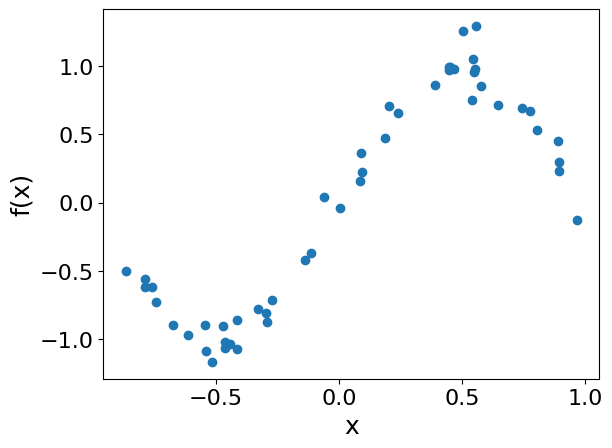

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X, Y)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x)", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.show()